**Logistic regression** is a supervised machine learning algorithm used for binary classification tasks. It estimates the relationship between a dependent variable and one or more independent variables using a sigmoid function to model probabilities.

For a single independent variable, the logistic regression model is represented as:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$



Where:

* 𝑃(𝑌=1∣𝑋): Probability that the dependent variable 𝑌 equals 1, given the independent variable 𝑋.

* 𝛽0: Intercept term.

* 𝛽1: Coefficient (weight) of the independent variable 𝑋.

When there are multiple independent variables, the logistic regression equation becomes:

$$
P(Y = 1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$
]
]


Where:

* X1,X2,…,Xn: Independent variables.

* β1,β2,…,βn: Coefficients corresponding to each independent variable.

The sigmoid function ensures the output is between 0 and 1, making it interpretable as a probability. Logistic regression is ideal for problems where the target variable is binary (e.g., 0 or 1, "No" or "Yes").

# Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('C:/Users/User/Downloads/predict_heart_disease.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Check for missing values

In [ ]:
df

Dataset Overview:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  


In [18]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Data Exploration


Summary Statistics:
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.1

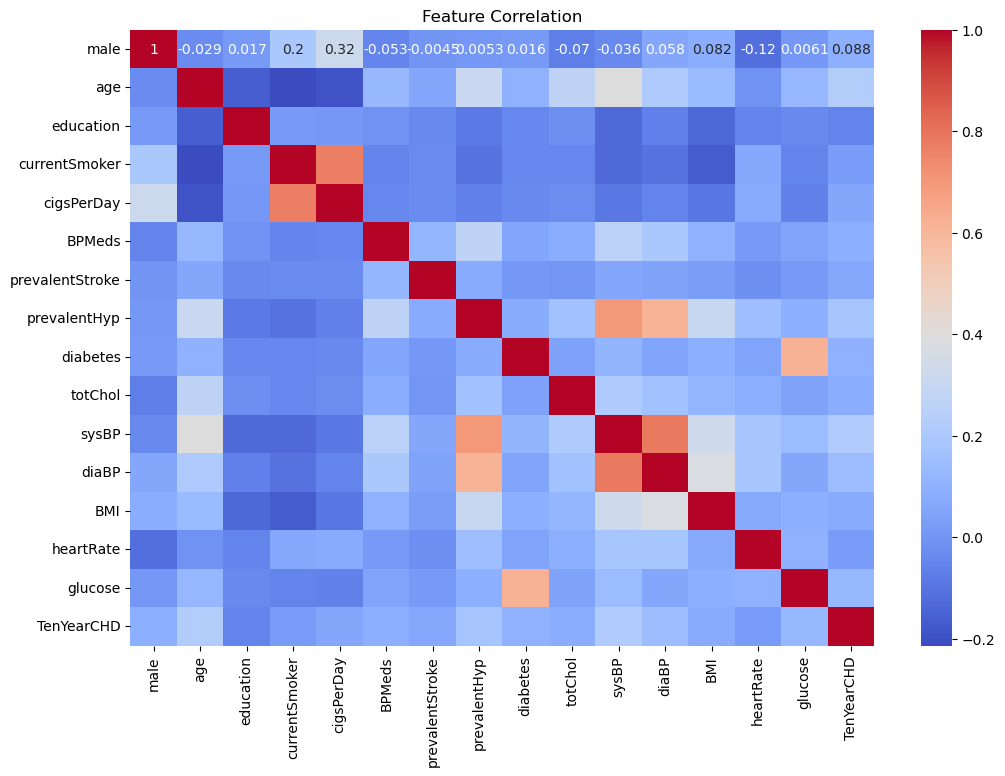

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

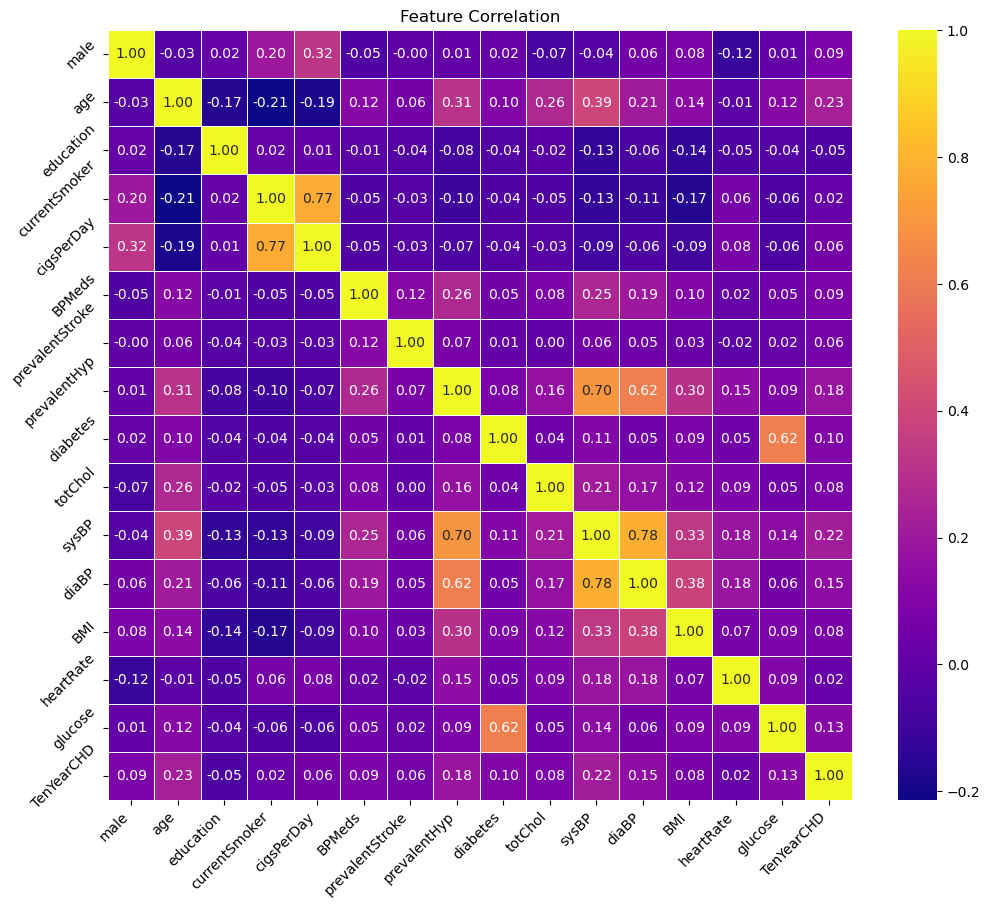

In [52]:
print(df.describe())

plt.figure(figsize=(12, 10))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='plasma', linewidths=0.5)
plt.title('Feature Correlation')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Show the plot
plt.show()


# Handling missing values (if any)

In [3]:
def handle_missing_values(df):
    return df.fillna(df.mean())

cleaned_data_missing = handle_missing_values(df)

**Test case**

x: [24, 50, 15, 38, None, 36, 12, 81, 25, None]

y: [21.54945, 47.46446, 17.21866, 36.5864, 87.28898, None, 10.7809, 80.7634, 24.61215, None]

In [58]:
y = [21.54945, 47.46446, 17.21866, 36.5864, 87.28898, None, 10.7809, 80.7634, 24.61215, None]
y = pd.DataFrame(y)
handle_missing_values(y)

,0
0,21.54945
1,47.46446
2,17.21866
3,36.58640
4,87.28898
5,40.78305
6,10.78090
7,80.76340
8,24.61215
9,40.78305


# Removing Duplicates

In [5]:
def remove_duplicates(df):
    return df.drop_duplicates()

cleaned_data_duplicates = remove_duplicates(df)

**Test Case**

x: [24, 24, 15, 38, 87, 36, 12, 12, 25, 5]

y: [21.54945, 21.54945, 17.21866, 36.5864, 87.28898, 32.46387, 10.7809, 10.7809, 24.61215, 6.963319]

In [67]:
y = [24, 24, 15, 38, 87, 36, 12, 12, 25, 5]
y = pd.DataFrame(y)
remove_duplicates(y)

,0
0,24
2,15
3,38
4,87
5,36
6,12
8,25
9,5


# Handle Outliers

In [7]:
def handle_outliers(df, column):
    c = df[column]
    Q1 = np.percentile(c, 25)
    Q3 = np.percentile(c, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    maxout = df[c > upper].index
    minout = df[c < lower].index
    df.loc[maxout, column] = upper
    df.loc[minout, column] = lower
    print(upper, lower)
    return df

cleaned_data_outliers = handle_outliers(df, 'diabetes')

0.0 0.0


**Test Case**

x: [24, 50, 15, 38, 87, 36, 12, 81, 25, 5, 100, 150]

y: [21.54945, 47.46446, 17.21866, 36.5864, 87.28898, 32.46387, 10.7809, 80.7634, 24.61215, 6.963319, 200, 300] })

In [91]:
y = [-100, 50, 15, 38, 87, 36, 12, 81, 25, 5, 1000, 1500]
y = pd.DataFrame(y)
handle_outliers(y, 0)

184.875 -88.125


C:\Users\User\AppData\Local\Temp\ipykernel_11128\1774704424.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '184.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[maxout, column] = upper


,0
0,-88.125
1,50.000
2,15.000
3,38.000
4,87.000
5,36.000
6,12.000
7,81.000
8,25.000
9,5.000


# Standardizing the Data

In [9]:
def standardize_data(df, columns):
    x = df[columns]
    y = (x - np.mean(x)) / np.std(x)
    df[columns] = y
    return df

# cleaned_data_standardized = standardize_data(data, ['x1', 'x2'])

**Test Case**

x: [24, 50, 15, 38, 87, 36, 12, 81, 25, 5]

y: [21.5, 47.4, 17.2, 36.5, 87.2, 32.4, 10.7, 80.7, 24.6, 6.9]

In [149]:
df = pd.read_csv('C:/Users/User/Downloads/predict_heart_disease.csv')
df = handle_missing_values(df)
# print(df)
df = remove_duplicates(df)
# print(df)
df = handle_outliers(df, 'cigsPerDay')  #cigsPerDay
# print(df)
df = standardize_data(df, 'cigsPerDay') 
df = handle_outliers(df, 'currentSmoker') #currentSmoker
df = standardize_data(df, 'currentSmoker') 
print(df)

data = df[['cigsPerDay', 'currentSmoker']].to_numpy()
# data = df[['diaBP', 'sysBP']].to_numpy()
data

50.0 -30.0
2.5 -1.5
      male  age  education  currentSmoker  cigsPerDay   BPMeds  \
0        1   39        4.0      -0.988271   -0.763194  0.00000   
1        0   46        2.0      -0.988271   -0.763194  0.00000   
2        1   48        1.0       1.011868    0.938008  0.00000   
3        0   61        3.0       1.011868    1.788609  0.00000   
4        0   46        3.0       1.011868    1.193188  0.00000   
...    ...  ...        ...            ...         ...      ...   
4233     1   50        1.0       1.011868   -0.678134  0.00000   
4234     1   51        3.0       1.011868    2.894390  0.00000   
4235     0   48        2.0       1.011868    0.938008  0.02963   
4236     0   44        1.0       1.011868    0.512707  0.00000   
4237     0   52        2.0      -0.988271   -0.763194  0.00000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0        

array([[-0.76319442, -0.98827076],
       [-0.76319442, -0.98827076],
       [ 0.9380076 ,  1.01186844],
       ...,
       [ 0.9380076 ,  1.01186844],
       [ 0.51270709,  1.01186844],
       [-0.76319442, -0.98827076]])

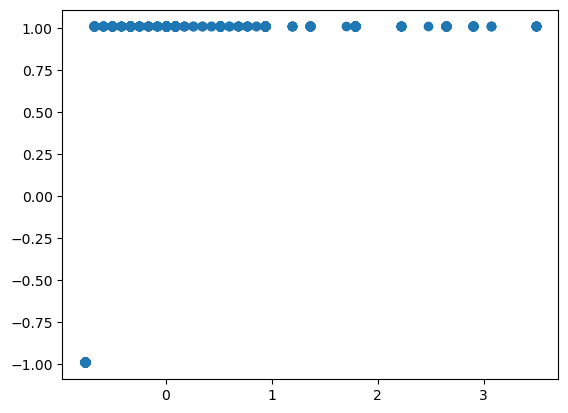

In [151]:
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.show()

# Define the Sigmoid Function

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [18]:
# Test Case
z = np.array([-500, -1, 0, 1, 500])
expected_output = np.array([7.124576e-218, 0.268941, 0.5, 0.731059, 1.0])

output = sigmoid(z)

assert np.allclose(output, expected_output, atol=1e-6), f"Output mismatch. Got {output}"
print("Sigmoid test passed!")

Sigmoid test passed!


# Define the Cost Function



$$
J(\theta) = -\frac{1}{m} \sum \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$


In [23]:
def compute_cost(X, y, weights):
    m = len(X)
    ypred = sigmoid(X.dot(weights))
    return (-1/m * (np.sum((y * np.log(ypred)) + ((1-y) * np.log(1-ypred)))))


In [26]:
# Test Case
X = np.array([[1, 0.5], [1, 1.5], [1, 2.5]])
y = np.array([0, 1, 1])
weights = np.array([0.1, 0.2])

expected_cost = 1

output_cost = round(compute_cost(X, y, weights))
assert np.isclose(output_cost, expected_cost, atol=1e-5), f"Cost mismatch. Got {output_cost}"
print("Compute cost test passed!")

Compute cost test passed!


# Gradient Descent for Weight Update

### Gradients Computation:
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum (\hat{y} - y) \cdot x_j
$$

### Weights Update:
$$
\theta = \theta - \alpha \cdot \nabla J
$$


In [117]:
def gradient_descent(X, y, weights, learning_rate, epochs, reg_lambda=0.1):
    m = len(X)
    losses = []
    for e in range(epochs):
        ypred = sigmoid(X.dot(weights))
        grad = (1/m) * X.T.dot(ypred - y)
        grad[1:] +=(reg_lambda/m) *weights[1:] 
        weights -= learning_rate * grad
        loss = compute_cost(X, y, weights)
        losses.append(loss)
        
        if e % 10 == 0:  
            print(f'Epoch {e}, Cost: {loss}')
    
    return weights, losses

# Train the Logistic Regression Model

In [157]:
X = data[:,0].reshape(-1,1)
X = np.hstack((X.reshape(-1, 1), np.ones((X.shape[0], 1))))
y = data[:,1].reshape(-1,1)
learning_rate = 0.1
epochs = 100
reg_lambda = 0.1
weights = np.random.randn(X.shape[1],1) * learning_rate
weights = np.ones(X.shape[1]).reshape(-1,1)
trained_weights, _ = gradient_descent(X, y, weights, learning_rate, epochs, reg_lambda)
print(trained_weights)

Epoch 0, Cost: 0.5365303718429009
Epoch 10, Cost: -0.13427032565687783
Epoch 20, Cost: -0.587236436598178
Epoch 30, Cost: -0.9368109196563662
Epoch 40, Cost: -1.2360499720228897
Epoch 50, Cost: -1.5088492264549969
Epoch 60, Cost: -1.7667446549645618
Epoch 70, Cost: -2.0157194816425856
Epoch 80, Cost: -2.2590662321822874
Epoch 90, Cost: -2.498687365920581
[[ 5.2500871 ]
 [-2.75697447]]


In [258]:
print(X.shape, y.shape)

(4238, 2) (4238, 1)


Epoch 0: Cost = 4.9966
Epoch 100: Cost = 1.6810
Epoch 200: Cost = 5.2980
Epoch 300: Cost = 3.7651
Epoch 400: Cost = 4.6345
Epoch 500: Cost = 2.8626
Epoch 600: Cost = 5.2863
Epoch 700: Cost = 0.7156
Epoch 800: Cost = 1.1062
Epoch 900: Cost = 5.2871


In [62]:
# Test Case
X = np.array([[1, 0.5], [1, 1.5], [1, 2.5]])
y = np.array([0, 1, 1])
weights = np.array([0.1, 0.2])
learning_rate = 0.1
epochs = 10
reg_lambda = 0.1

expected_weights = np.array([0.11597737, 0.49419525])  # Placeholder, compute exact value
# expected_weights = np.array([0.1265, 0.2755]) 

trained_weights, _ = gradient_descent(X, y, weights, learning_rate, epochs, reg_lambda)
assert np.allclose(trained_weights, expected_weights, atol=1e-2), f"Weight mismatch. Got {trained_weights}"
print("Gradient descent test passed!")

Epoch 0, Cost: 0.5669652100644437
Epoch 1, Cost: 0.5534057949260858
Epoch 2, Cost: 0.541761459983865
Epoch 3, Cost: 0.5316809573136145
Epoch 4, Cost: 0.5228840049009609
Epoch 5, Cost: 0.5151462240858289
Epoch 6, Cost: 0.5082872441743005
Epoch 7, Cost: 0.5021613896995549
Epoch 8, Cost: 0.49665041862825277
Epoch 9, Cost: 0.4916578646202208
Gradient descent test passed!


# Make Predictions

$$
\hat{y} = \sigma(X \cdot \theta)
$$


In [159]:
def predict(X, weights, threshold=None):
    preds = sigmoid(X.dot(weights))
    if not threshold:
        return preds
    else:
        return preds >= threshold
        

# Predictions
y_pred = predict(X, weights)
y_pred_proba = sigmoid(np.dot(X, weights))

In [194]:
# Inputs
X = np.array([[1, 0.5], [1, 1.5], [1, 2.5]])
weights = np.array([0.1, 0.2])
threshold = 0.5

# Expected predictions
expected_predictions = np.array([1, 1, 1])

# Test
output_predictions = predict(X, weights, threshold)
assert np.array_equal(output_predictions, expected_predictions), f"Prediction mismatch. Got {output_predictions}"
print("Predict function test passed!")

Predict function test passed!


# Evaluate the Model

Accuracy: 0.79


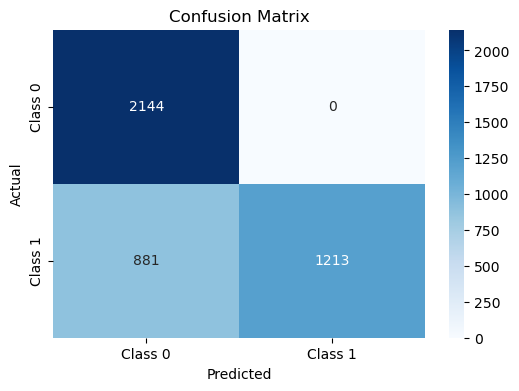

In [165]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_test = y.astype('int')
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)


accuracy = np.mean(y_pred == y_test)  
# precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
# recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
# f1 = 2 * (precision * recall) / (precision + recall)
# roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print(f"ROC-AUC: {roc_auc:.2f}")

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# from sklearn.metrics import roc_curve
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
# plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
# plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend()
# plt.grid()
# plt.show()


In [169]:
# import numpy as np
# from sklearn.model_selection import KFold

# learning_rate = 0.1
# epochs = 100
# reg_lambda = 0.1

# # k-Fold Cross-Validation
# k = 5  # Number of folds
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# fold_metrics = []  # Store evaluation metrics for each fold

# for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
#     print(f"Processing Fold {fold + 1}/{k}...")
    
#     X_train, X_test = X[train_idx], X[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]

#     weights = np.ones(X_train.shape[1]).reshape(-1, 1)
    
#     trained_weights, _ = gradient_descent(X_train, y_train, weights, learning_rate, epochs, reg_lambda)
    
#     y_pred_probs = 1 / (1 + np.exp(-np.dot(X_test, trained_weights)))  # Sigmoid
    
#     y_pred = (y_pred_probs >= 0.5).astype(int)
#     accuracy = np.mean(y_pred == y_test)
#     fold_metrics.append(accuracy)
    
#     print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# mean_accuracy = np.mean(fold_metrics)
# print(f"\nMean Accuracy across {k} folds: {mean_accuracy:.4f}")
